# Depression, Demographic Characteristics, and Healthy Habits - EDA and Statistical Inference

### Objectives: 
### (1) Verify if the individuals interviewed for the research represent the real population;
### (2) Verify which demographic characteristics and healthy habits are more or less correlated to the presence of symptoms of depression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Variables from DEMO_PHQ.csv (habits, feelings, demographic characteristics, and activities data).

#### Symptoms of depression - Measure range from 0 to 3 (0 = “never”, 1 = “less than one week”, 2 = “one week or more”, 3 = “almost everyday”, 7 = "refused to answer" e 9 = "doesn't know").
#### Questions:
####1 - Low interest or pleasure in doing things;
####2 - Felt down, depressed, or without perspective;
####3 - Difficulty to sleep, keep sleeping, or slept more than usual;
####4 - Felt tired and with low energy;
####5 - Missing appetize, or ate more than usual;
####6 - Felt bad with yourself, felt like failed, or that you disappointed your family, or yourself;
####7 - Difficulty to concentrate;
####8 - Slowly moved or spoke (to the point that other people noticed), or have been so agitated that kept walking, or moving more than usual;
####9 - Thought about hurting yourself, or that would be better to be dead.

#### Ethnicity 

####1 - White non-hispanic;

####2 - Black non-hispanic;

####3 - Mexican-american;

####4 - Others;

####5 - Others hispanic.

#### Sex

####1 - Male;

####2 - Female.

#### Age

#### Level of graduation

####1 - Incomplete elementary school;

####2 - Incomplete high school;

####3 - Complete high school;

####4 - Incomplete college;

####5 - Complete college or higher education;

####7 - Refused to answer;

####9 - Doesn't know.

#### Family income (US$)

####1 - 0-4999;
####2 - 5000-9999;
####3 - 10000-14999;
####4 - 15000-19999;
####5 - 20000-24999;
####6 - 25000-34999;
####7 - 35000-44999;
####8 - 45000-54999;
####9 - 55000-64999;
####10 - 65000-74999; 
####11 - Higher than 75000;
####12 - Higher than 20000;
####13 - Lower than 20000;
####77 - Refused to answer;
####99 - Doesn't know;

#### SEQN - index used for each individual.

### Variables from PAG_HEI (ranked alimentation habits data and frequency of physical activities).

#### HEI uses different food groups to calculate the score, ranging from 0 to 100, where the highest score values mean that the alimentation is closer to the recommended.
#### The index is calculated from 13 components based on food groups described in HEI diet recommendations. Details of the maximum values and interpretations are described below. (food groups: vegetables, green and beans, total fruits, in natura fruits, whole grain, dairy, proteins, proteins from seafood and plants, fatty acid, sodium, refined grains, saturated fat, and sugar - "TOTAL" is the variable which receives the sum of the score for each individual).

#### PAG recommends that adults practice at least 150 min of aerobic activities with medium intensity or 75 minutes of aerobic activities with high intensity per week.
#### From the collected data by NHANES, is possible to calculate the amount of minutes of physical activity, defined as the total minutes of physical activities with medium intensity + 2*(total minutes of physical activity with high intensity). The variable "ADHERENCE" classifies the quantity of exercise done in a week per individual, and is divided in 3 classes: #1 Low (< 150 min/week) - #2 Appropriate (150-300 min/week) - #3 High (> 300 min/week).

## PHQ Data Treatment

In [2]:
PHQ = pd.read_csv("DEMO_PHQ.csv")
PHQ.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [3]:
PHQ.tail()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0
5333,41473,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1,21,1,2,6.0


#### Let's change the collumns' names to make analysis easier.

In [4]:
PHQ.rename(
    columns={
        "DPQ010": "Q1",
        "DPQ020": "Q2",
        "DPQ030": "Q3",
        "DPQ040": "Q4",
        "DPQ050": "Q5",
        "DPQ060": "Q6",
        "DPQ070": "Q7",
        "DPQ080": "Q8",
        "DPQ090": "Q9",
        "RIAGENDR": "Sex",
        "RIDAGEYR": "Age",
        "RIDRETH1": "Ethnicity",
        "DMDEDUC": "Graduation_Level",
        "INDFMINC": "Family_Income",
    },
    inplace=True,
)

PHQ.head()

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Sex,Age,Ethnicity,Graduation_Level,Family_Income
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


#### Variables types and null data inforation.

In [5]:
PHQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEQN              5334 non-null   int64  
 1   Q1                4836 non-null   float64
 2   Q2                4836 non-null   float64
 3   Q3                4836 non-null   float64
 4   Q4                4836 non-null   float64
 5   Q5                4836 non-null   float64
 6   Q6                4836 non-null   float64
 7   Q7                4836 non-null   float64
 8   Q8                4836 non-null   float64
 9   Q9                4836 non-null   float64
 10  Sex               5334 non-null   int64  
 11  Age               5334 non-null   int64  
 12  Ethnicity         5334 non-null   int64  
 13  Graduation_Level  5334 non-null   int64  
 14  Family_Income     5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


#### Quantity of null values.

In [6]:
PHQ.isnull().sum()

SEQN                  0
Q1                  498
Q2                  498
Q3                  498
Q4                  498
Q5                  498
Q6                  498
Q7                  498
Q8                  498
Q9                  498
Sex                   0
Age                   0
Ethnicity             0
Graduation_Level      0
Family_Income        47
dtype: int64

#### General statistical analysis of PHQ DF.

In [7]:
PHQ.describe()

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Sex,Age,Ethnicity,Graduation_Level,Family_Income
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


#### Understanding the influence of NaN and null values

In [8]:
PHQ["Q1"].unique()

array([nan,  0.,  1.,  2.,  3.,  9.])

#### Is possible to check how influent is the answer "9" (doen'st know) in percentage.

In [9]:
print("frequencies for Q1:")
print(PHQ["Q1"].value_counts(normalize=True))

print("frequencies for Q2:")
print(PHQ["Q2"].value_counts(normalize=True))

print("frequencies for Q3:")
print(PHQ["Q3"].value_counts(normalize=True))

print("frequencies for Q4:")
print(PHQ["Q4"].value_counts(normalize=True))

print("frequencies for Q5:")
print(PHQ["Q5"].value_counts(normalize=True))

print("frequencies for Q6:")
print(PHQ["Q6"].value_counts(normalize=True))

print("frequencies for Q7:")
print(PHQ["Q7"].value_counts(normalize=True))

print("frequencies for Q8:")
print(PHQ["Q8"].value_counts(normalize=True))

print("frequencies for Q9:")
print(PHQ["Q9"].value_counts(normalize=True))

frequencies for Q1:
0.0    0.796112
1.0    0.139165
2.0    0.037221
3.0    0.025641
9.0    0.001861
Name: Q1, dtype: float64
frequencies for Q2:
0.0    0.779363
1.0    0.159016
2.0    0.037014
3.0    0.023573
9.0    0.001034
Name: Q2, dtype: float64
frequencies for Q3:
0.0    0.651778
1.0    0.221464
3.0    0.066170
2.0    0.059140
9.0    0.001447
Name: Q3, dtype: float64
frequencies for Q4:
0.0    0.502275
1.0    0.352771
2.0    0.076510
3.0    0.067411
9.0    0.001034
Name: Q4, dtype: float64
frequencies for Q5:
0.0    0.788462
1.0    0.142887
3.0    0.034739
2.0    0.033085
9.0    0.000827
Name: Q5, dtype: float64
frequencies for Q6:
0.0    0.854839
1.0    0.106079
2.0    0.019644
3.0    0.018404
9.0    0.001034
Name: Q6, dtype: float64
frequencies for Q7:
0.0    0.841605
1.0    0.112696
2.0    0.024400
3.0    0.020471
9.0    0.000827
Name: Q7, dtype: float64
frequencies for Q8:
0.0    0.901985
1.0    0.070513
2.0    0.016336
3.0    0.009305
9.0    0.001861
Name: Q8, dtype: float64


#### As we can see, the answer "9" is not significant. It is possible to check it in the graphs below.

<Figure size 432x288 with 0 Axes>

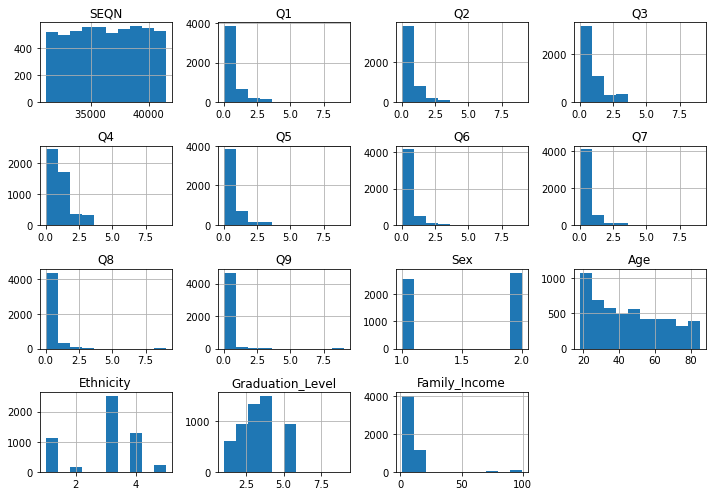

In [10]:
plt.clf()
PHQ.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()

#### As the distributions from "Q1"to "Q9" are non-symetrical, and outliers have high influence in mean calculation, let's replace the answer "9" by another option.
#### For non-symetrical distributions is recommended to replace values for the median.

In [11]:
PHQ["Q1"] = PHQ["Q1"].replace([9], PHQ[["Q1"]].loc[PHQ["Q1"] <= 3].median())

PHQ["Q2"] = PHQ["Q2"].replace([9], PHQ[["Q2"]].loc[PHQ["Q2"] <= 3].median())

PHQ["Q3"] = PHQ["Q3"].replace([9], PHQ[["Q3"]].loc[PHQ["Q3"] <= 3].median())

PHQ["Q4"] = PHQ["Q4"].replace([9], PHQ[["Q4"]].loc[PHQ["Q4"] <= 3].median())

PHQ["Q5"] = PHQ["Q5"].replace([9], PHQ[["Q5"]].loc[PHQ["Q5"] <= 3].median())

PHQ["Q6"] = PHQ["Q6"].replace([9], PHQ[["Q6"]].loc[PHQ["Q6"] <= 3].median())

PHQ["Q7"] = PHQ["Q7"].replace([9], PHQ[["Q7"]].loc[PHQ["Q7"] <= 3].median())

PHQ["Q8"] = PHQ["Q8"].replace([9], PHQ[["Q8"]].loc[PHQ["Q8"] <= 3].median())

PHQ["Q9"] = PHQ["Q9"].replace([9], PHQ[["Q9"]].loc[PHQ["Q9"] <= 3].median())

In [12]:
PHQ.describe().round(2)

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Sex,Age,Ethnicity,Graduation_Level,Family_Income
count,5334.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,5334.00,5334.00,5334.00,5287.00
mean,36358.80,0.29,0.30,0.54,0.71,0.31,0.20,0.22,0.13,0.05,1.52,45.09,2.87,3.23,8.74
std,2964.73,0.66,0.65,0.87,0.87,0.70,0.56,0.59,0.45,0.27,0.50,20.15,1.13,1.27,12.78
min,31130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00
25%,33838.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00
50%,36347.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00,3.00,3.00,7.00
75%,38915.75,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,62.00,4.00,4.00,10.00
max,41473.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,85.00,5.00,9.00,99.00


#### For the next step, we will verify what we can do to replace the answers "77"and "99" for the Family Income, and what we can do for the null values.

<AxesSubplot:>

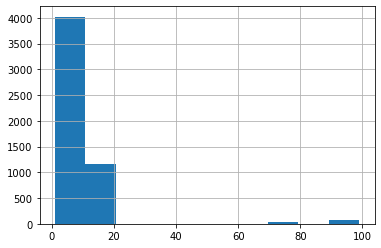

In [13]:
PHQ["Family_Income"].hist()

#### Let's turn it into a more visual graph.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family_Income', ylabel='Density'>

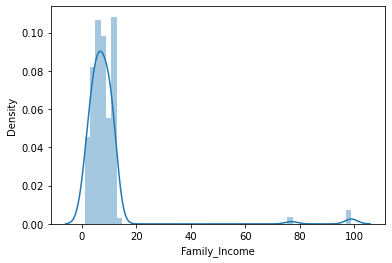

In [14]:
sns.distplot(PHQ["Family_Income"])

#### Verifying if the "77" and "99" answers are outliers.

<AxesSubplot:xlabel='Family_Income'>

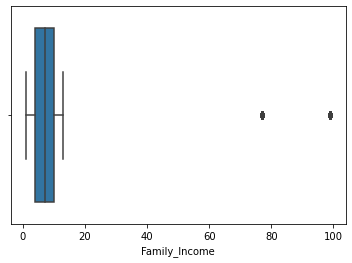

In [15]:
sns.boxplot(x="Family_Income", data=PHQ)

#### There iso no interest here to keep the outliers in this analysis.
#### As deleting these rows would not be the best choice due to the lost of more data, let's study the data replacement.

In [16]:
print(PHQ["Family_Income"].describe())
print("Median of the Family Income:", PHQ["Family_Income"].median())
print("Mode of the Family Income:", PHQ["Family_Income"].mode(dropna=True))
print(PHQ["Family_Income"].value_counts(normalize=True))

count    5287.000000
mean        8.738604
std        12.777756
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        99.000000
Name: Family_Income, dtype: float64
Median of the Family Income: 7.0
Mode of the Family Income: 0    11.0
dtype: float64
11.0    0.197465
6.0     0.128239
7.0     0.101192
8.0     0.091734
3.0     0.083223
5.0     0.080575
4.0     0.077927
9.0     0.056176
2.0     0.053149
10.0    0.052582
1.0     0.035937
12.0    0.014753
99.0    0.014564
77.0    0.006809
13.0    0.005674
Name: Family_Income, dtype: float64


#### It is interesting to notice that the density curve did not follow the mode, being closer to the median ("7").
#### This is why we are going to replace "77" and "99" by the median.

In [17]:
PHQ["Family_Income"] = PHQ["Family_Income"].replace(
    [77], PHQ["Family_Income"].median()
)
PHQ["Family_Income"] = PHQ["Family_Income"].replace(
    [99], PHQ["Family_Income"].median()
)

print(PHQ["Family_Income"].describe())
print(PHQ["Family_Income"].value_counts())

count    5287.000000
mean        6.922073
std         3.102240
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        13.000000
Name: Family_Income, dtype: float64
11.0    1044
6.0      678
7.0      648
8.0      485
3.0      440
5.0      426
4.0      412
9.0      297
2.0      281
10.0     278
1.0      190
12.0      78
13.0      30
Name: Family_Income, dtype: int64


#### Checking the distribution after treatment.

AxesSubplot(0.125,0.125;0.775x0.755)


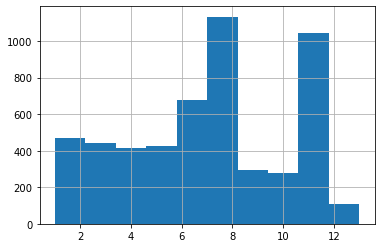

In [18]:
print(PHQ["Family_Income"].hist());

AxesSubplot(0.125,0.125;0.775x0.755)


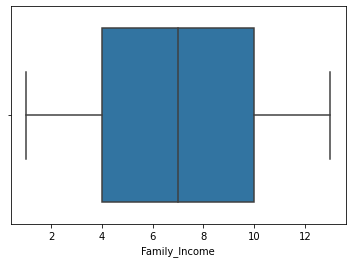

In [19]:
print(sns.boxplot(x="Family_Income", data=PHQ))

## PAG_HEI Data Treatment

#### Just like we did before, let's begin with reading the .csv file and check the head and tail from the data frame.

In [20]:
PAG = pd.read_csv("PAG_HEI.csv")

PAG.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [21]:
PAG.tail()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478
9423,41474,0.000000,1.0,1.238646,4.610515,0.688137,0.240848,5.000000,5.000000,4.304982,5.000000,2.162293,7.018993,10.000000,7.541082,0.000000,52.805494


#### Simplifying the names of the columns.

In [22]:
PAG.rename(
    columns={
        "PAG_MINW": "ACTIV_MIN",
        "HEI2015C1_TOTALVEG": "VEG",
        "HEI2015C2_GREEN_AND_BEAN": "GREEN_AND_BEAN",
        "HEI2015C3_TOTALFRUIT": "FRUITS_TOT",
        "HEI2015C4_WHOLEFRUIT": "FRUITS_NAT",
        "HEI2015C5_WHOLEGRAIN": "GRAINS",
        "HEI2015C6_TOTALDAIRY": "DAIRY",
        "HEI2015C7_TOTPROT": "PROT_TOT",
        "HEI2015C8_SEAPLANT_PROT": "PROT_SEAPLANT",
        "HEI2015C9_FATTYACID": "FATTYACID",
        "HEI2015C10_SODIUM": "SODIUM",
        "HEI2015C11_REFINEDGRAIN": "REF_GRAINS",
        "HEI2015C12_SFAT": "SAT_FAT",
        "HEI2015C13_ADDSUG": "ADD_SUGAR",
        "HEI2015_TOTAL_SCORE": "TOTAL",
    },
    inplace=True,
)

PAG.head()

,SEQN,ACTIV_MIN,ADHERENCE,VEG,GREEN_AND_BEAN,FRUITS_TOT,FRUITS_NAT,GRAINS,DAIRY,PROT_TOT,PROT_SEAPLANT,FATTYACID,SODIUM,REF_GRAINS,SAT_FAT,ADD_SUGAR,TOTAL
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


#### General info from PAG table.

In [23]:
PAG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            9424 non-null   int64  
 1   ACTIV_MIN       7150 non-null   float64
 2   ADHERENCE       7150 non-null   float64
 3   VEG             8549 non-null   float64
 4   GREEN_AND_BEAN  8549 non-null   float64
 5   FRUITS_TOT      8549 non-null   float64
 6   FRUITS_NAT      8549 non-null   float64
 7   GRAINS          8549 non-null   float64
 8   DAIRY           8549 non-null   float64
 9   PROT_TOT        8549 non-null   float64
 10  PROT_SEAPLANT   8549 non-null   float64
 11  FATTYACID       8549 non-null   float64
 12  SODIUM          8549 non-null   float64
 13  REF_GRAINS      8549 non-null   float64
 14  SAT_FAT         8549 non-null   float64
 15  ADD_SUGAR       8549 non-null   float64
 16  TOTAL           8549 non-null   float64
dtypes: float64(16), int64(1)
memory u

## Merging the databases into one and its treatment.

#### The PAG db has more rows than PHQ db due to the fact its research considers elements under 18 years old.
#### As we do not have all info from the kids and teens it is reasonable to merge only the rows that belong to PHQ db for good analysis.
#### To execute it this way, we will merge calling PHQ as the main db and apply the "left" option.

In [24]:
df = PHQ.merge(PAG, on="SEQN", how="left")
df.columns

Index(['SEQN', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Sex',
       'Age', 'Ethnicity', 'Graduation_Level', 'Family_Income', 'ACTIV_MIN',
       'ADHERENCE', 'VEG', 'GREEN_AND_BEAN', 'FRUITS_TOT', 'FRUITS_NAT',
       'GRAINS', 'DAIRY', 'PROT_TOT', 'PROT_SEAPLANT', 'FATTYACID', 'SODIUM',
       'REF_GRAINS', 'SAT_FAT', 'ADD_SUGAR', 'TOTAL'],
      dtype='object')

In [25]:
df.head()

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,GRAINS,DAIRY,PROT_TOT,PROT_SEAPLANT,FATTYACID,SODIUM,REF_GRAINS,SAT_FAT,ADD_SUGAR,TOTAL
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEQN              5334 non-null   int64  
 1   Q1                4836 non-null   float64
 2   Q2                4836 non-null   float64
 3   Q3                4836 non-null   float64
 4   Q4                4836 non-null   float64
 5   Q5                4836 non-null   float64
 6   Q6                4836 non-null   float64
 7   Q7                4836 non-null   float64
 8   Q8                4836 non-null   float64
 9   Q9                4836 non-null   float64
 10  Sex               5334 non-null   int64  
 11  Age               5334 non-null   int64  
 12  Ethnicity         5334 non-null   int64  
 13  Graduation_Level  5334 non-null   int64  
 14  Family_Income     5287 non-null   float64
 15  ACTIV_MIN         5334 non-null   float64
 16  ADHERENCE         5334 non-null   float64


In [27]:
df.shape

(5334, 31)

#### Now it is time to eliminate the rows that are not interesting for our analysis.
#### Starting with the deleting the rows with NaN values in the variables "Q1" to "Q9".
#### It makes no sense to analyze more info from these rows since we don't have the main information for comparison.

In [28]:
df.isnull().sum()

SEQN                  0
Q1                  498
Q2                  498
Q3                  498
Q4                  498
Q5                  498
Q6                  498
Q7                  498
Q8                  498
Q9                  498
Sex                   0
Age                   0
Ethnicity             0
Graduation_Level      0
Family_Income        47
ACTIV_MIN             0
ADHERENCE             0
VEG                 274
GREEN_AND_BEAN      274
FRUITS_TOT          274
FRUITS_NAT          274
GRAINS              274
DAIRY               274
PROT_TOT            274
PROT_SEAPLANT       274
FATTYACID           274
SODIUM              274
REF_GRAINS          274
SAT_FAT             274
ADD_SUGAR           274
TOTAL               274
dtype: int64

#### The low percentage (less than 10%) of rows with NaN values "allows us" to drop them out of the db.

In [29]:
df.dropna(
    axis=0, subset=["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9"], inplace=True
)

df["Q1"].unique()

array([0., 1., 2., 3.])

#### Making progress of symptoms of depression columns, let's create the column "phq9" which displays the sum from "Q1" to "Q9" for each row.

In [30]:
df["phq9"] = (
    df["Q1"]
    + df["Q2"]
    + df["Q3"]
    + df["Q4"]
    + df["Q5"]
    + df["Q6"]
    + df["Q7"]
    + df["Q8"]
    + df["Q9"]
)
print(df["phq9"].describe())

count    4836.000000
mean        2.754963
std         3.753485
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq9, dtype: float64


#### It is important to remember to keep treating the other variables from the db, and we still have some null values to take care of.

In [31]:
df.isnull().sum()

SEQN                 0
Q1                   0
Q2                   0
Q3                   0
Q4                   0
Q5                   0
Q6                   0
Q7                   0
Q8                   0
Q9                   0
Sex                  0
Age                  0
Ethnicity            0
Graduation_Level     0
Family_Income       36
ACTIV_MIN            0
ADHERENCE            0
VEG                 99
GREEN_AND_BEAN      99
FRUITS_TOT          99
FRUITS_NAT          99
GRAINS              99
DAIRY               99
PROT_TOT            99
PROT_SEAPLANT       99
FATTYACID           99
SODIUM              99
REF_GRAINS          99
SAT_FAT             99
ADD_SUGAR           99
TOTAL               99
phq9                 0
dtype: int64

#### As we still have 99 null values in food groups columns and 36 in family income, the objective is to fill these cells after our distribution analysis.

In [32]:
pd.set_option("display.max_columns", None)
df.describe(include="all")

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Sex,Age,Ethnicity,Graduation_Level,Family_Income,ACTIV_MIN,ADHERENCE,VEG,GREEN_AND_BEAN,FRUITS_TOT,FRUITS_NAT,GRAINS,DAIRY,PROT_TOT,PROT_SEAPLANT,FATTYACID,SODIUM,REF_GRAINS,SAT_FAT,ADD_SUGAR,TOTAL,phq9
count,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4800.000000,4836.000000,4836.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4836.000000
mean,36344.588710,0.290529,0.303763,0.538255,0.708023,0.313275,0.200579,0.222911,0.131100,0.046526,1.517990,44.950372,2.860629,3.257651,6.956667,483.114915,2.000414,3.202517,1.794534,2.489617,2.364610,1.770618,3.769826,4.432712,2.586972,4.700483,4.751217,5.821063,6.036239,6.203522,49.923931,2.754963
std,2974.002141,0.659166,0.653488,0.874069,0.874283,0.699887,0.556886,0.587301,0.449953,0.271551,0.499728,19.900248,1.116212,1.253493,3.115241,794.854988,0.918611,1.460227,2.134834,1.949546,2.171624,1.911844,1.593342,1.006482,2.169018,3.234156,3.412203,3.484264,3.182964,3.336104,12.342940,3.753485
min,31131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000
25%,33805.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,5.000000,41.570439,1.000000,2.064762,0.000000,0.448681,0.000000,0.000000,2.622205,4.164134,0.000000,2.002189,1.586873,2.974336,3.653210,3.716599,40.929704,0.000000
50%,36343.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000,219.359122,2.000000,3.209060,0.041508,2.318754,2.087721,1.038915,4.944149,5.000000,2.571318,4.429780,4.820850,6.245713,6.377305,6.846888,49.478433,1.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,61.000000,4.000000,4.000000,10.000000,581.986143,3.000000,4.796827,4.435851,4.938134,5.000000,3.397186,5.000000,5.000000,5.000000,7.248504,7.638021,9.270773,8.960351,9.403905,58.062142,4.000000
max,41473.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,85.000000,5.000000,9.000000,13.000000,10777.829099,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,27.000000


<Figure size 432x288 with 0 Axes>

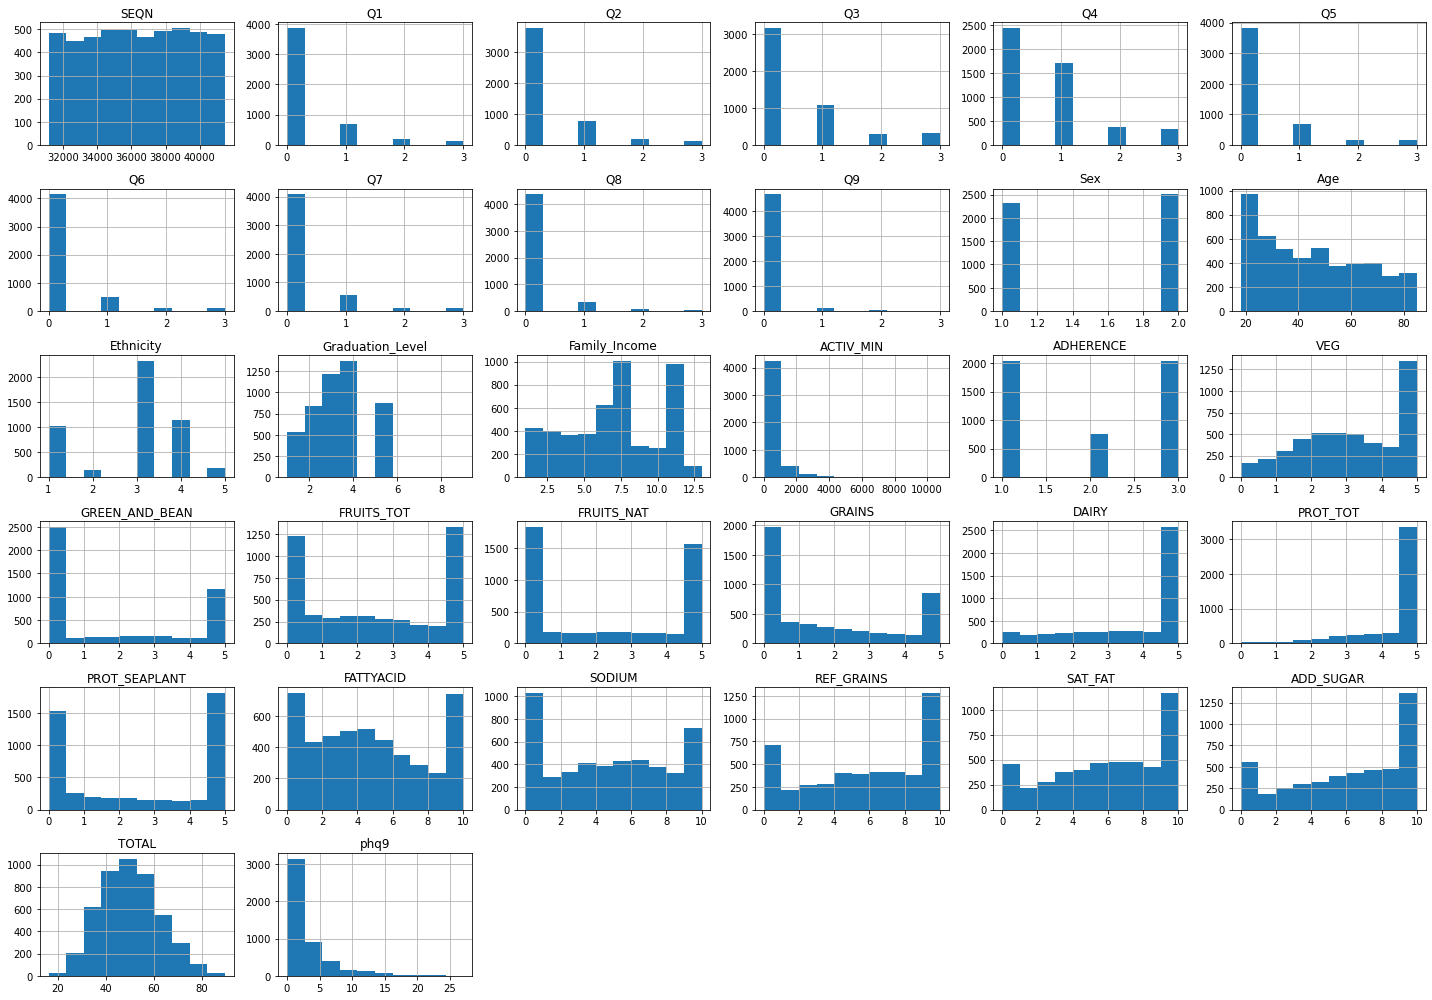

In [33]:
plt.clf()
df.hist(figsize=(20, 14))
plt.tight_layout()
plt.show()

#### The columns related to the individuals' alimentation have some extreme values that are very influential.
#### Just as we did for the answers "77" and "99" before, we will change them by the median for the Family Income variable and for each food group variable.
#### For the sum of the alimentation score ("TOTAL") we chose to replace it by the mean due to it presents a distribution close to tha normal distribution in the sample.

In [34]:
df["VEG"].fillna(df["VEG"].median(), inplace=True)

df["GREEN_AND_BEAN"].fillna(df["GREEN_AND_BEAN"].median(), inplace=True)

df["FRUITS_TOT"].fillna(df["FRUITS_TOT"].median(), inplace=True)

df["FRUITS_NAT"].fillna(df["FRUITS_NAT"].median(), inplace=True)

df["GRAINS"].fillna(df["GRAINS"].median(), inplace=True)

df["DAIRY"].fillna(df["DAIRY"].median(), inplace=True)

df["PROT_TOT"].fillna(df["PROT_TOT"].median(), inplace=True)

df["PROT_SEAPLANT"].fillna(df["PROT_SEAPLANT"].median(), inplace=True)

df["FATTYACID"].fillna(df["FATTYACID"].median(), inplace=True)

df["SODIUM"].fillna(df["SODIUM"].median(), inplace=True)

df["REF_GRAINS"].fillna(df["REF_GRAINS"].median(), inplace=True)

df["SAT_FAT"].fillna(df["SAT_FAT"].median(), inplace=True)

df["ADD_SUGAR"].fillna(df["ADD_SUGAR"].median(), inplace=True)

df["TOTAL"].fillna(df["TOTAL"].mean(), inplace=True)

df["Family_Income"].fillna(df["Family_Income"].median(), inplace=True)

df.isnull().sum()

SEQN                0
Q1                  0
Q2                  0
Q3                  0
Q4                  0
Q5                  0
Q6                  0
Q7                  0
Q8                  0
Q9                  0
Sex                 0
Age                 0
Ethnicity           0
Graduation_Level    0
Family_Income       0
ACTIV_MIN           0
ADHERENCE           0
VEG                 0
GREEN_AND_BEAN      0
FRUITS_TOT          0
FRUITS_NAT          0
GRAINS              0
DAIRY               0
PROT_TOT            0
PROT_SEAPLANT       0
FATTYACID           0
SODIUM              0
REF_GRAINS          0
SAT_FAT             0
ADD_SUGAR           0
TOTAL               0
phq9                0
dtype: int64

<Figure size 432x288 with 0 Axes>

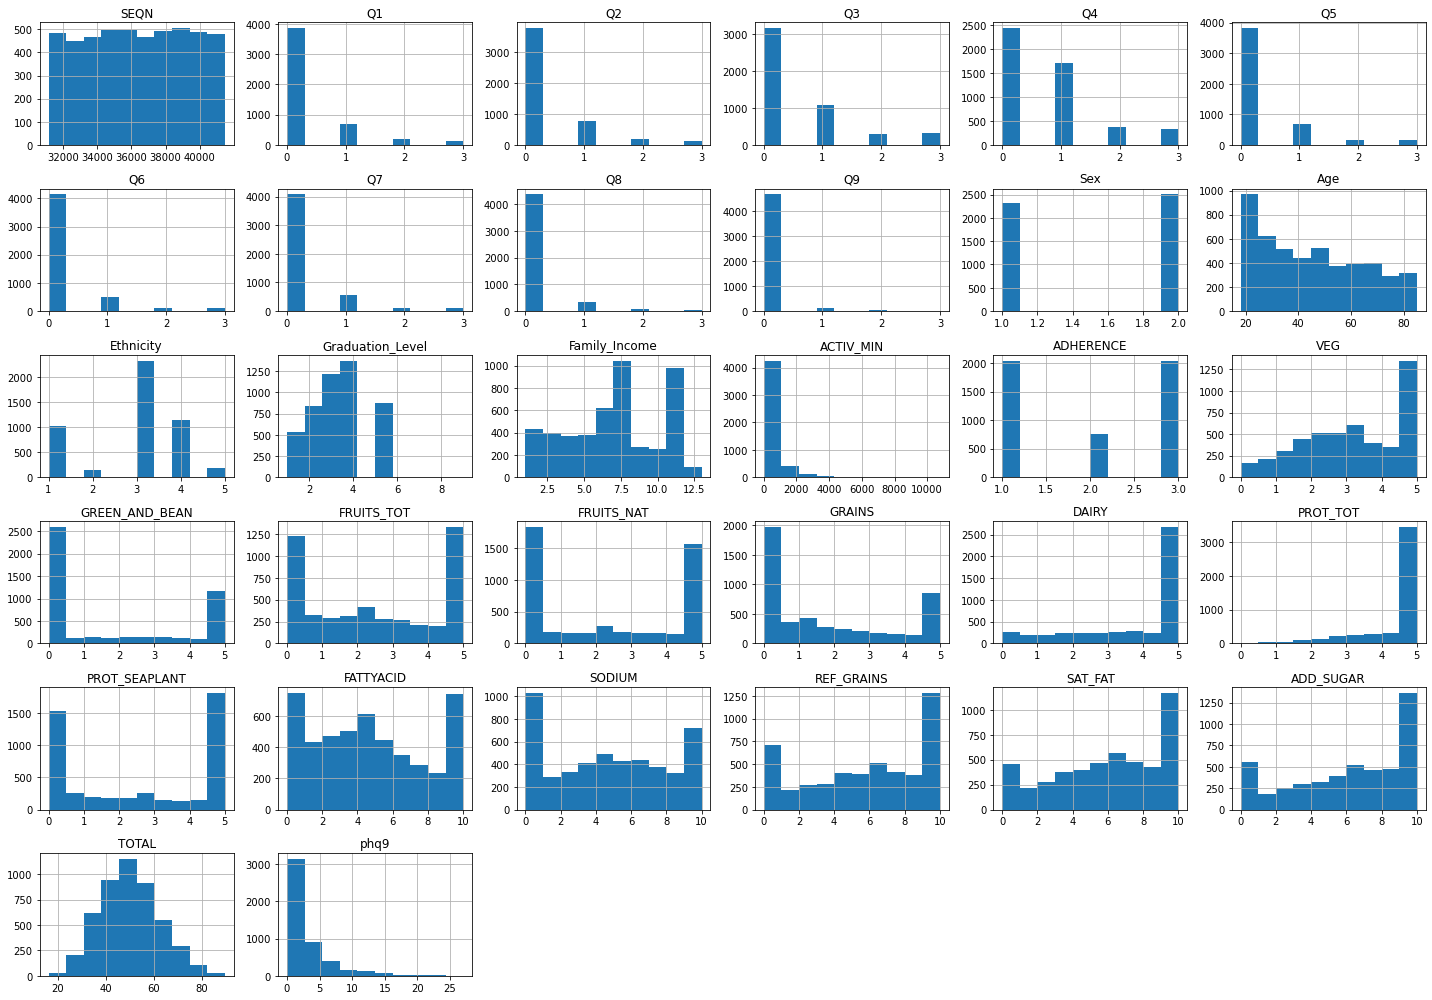

In [35]:
plt.clf()
df.hist(figsize=(20, 14))
plt.tight_layout()
plt.show()

## Bivariate Analysis

#### We can start this step by classifying the sum of symptoms of depression.

In [36]:
Dep_Diag = []

for i in df["phq9"]:
    if i < 5:
        Dep_Diag.append("No depression")
    elif i >= 5 and i <= 9:
        Dep_Diag.append("Low level")
    elif i >= 10 and i <= 14:
        Dep_Diag.append("Medium level")
    elif i >= 15 and i <= 19:
        Dep_Diag.append("Almost severe level")
    else:
        Dep_Diag.append("Severe level")

df["Depression_Diagnosis"] = Dep_Diag

df["Depression_Diagnosis"]

1       No depression
2       No depression
3       No depression
4       No depression
5           Low level
            ...      
5329    No depression
5330     Medium level
5331    No depression
5332    No depression
5333    No depression
Name: Depression_Diagnosis, Length: 4836, dtype: object

#### The same will be done for the Age.
#### from 18 to 29 years old: Adults 1.
#### from 30 to 44 years old: Adults 2.
#### from 45 to 59 years old: Adults 3.
#### from 60 years old on: Seniors.

In [37]:
Age_Dep = []

for i in df["Age"]:
    if i < 30:
        Age_Dep.append("Adults 1")
    elif i < 45:
        Age_Dep.append("Adults 2")
    elif i < 60:
        Age_Dep.append("Adults 3")
    else:
        Age_Dep.append("Seniors")

df["Age_Classif"] = Age_Dep

df["Age_Classif"]

1       Adults 2
2        Seniors
3        Seniors
4       Adults 1
5       Adults 1
          ...   
5329    Adults 3
5330     Seniors
5331    Adults 1
5332    Adults 2
5333    Adults 1
Name: Age_Classif, Length: 4836, dtype: object

In [38]:
df.head()

,SEQN,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Sex,Age,Ethnicity,Graduation_Level,Family_Income,ACTIV_MIN,ADHERENCE,VEG,GREEN_AND_BEAN,FRUITS_TOT,FRUITS_NAT,GRAINS,DAIRY,PROT_TOT,PROT_SEAPLANT,FATTYACID,SODIUM,REF_GRAINS,SAT_FAT,ADD_SUGAR,TOTAL,phq9,Depression_Diagnosis,Age_Classif
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,No depression,Adults 2
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,No depression,Seniors
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,No depression,Seniors
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,No depression,Adults 1
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Low level,Adults 1


#### let's make a crossed analysis between age, sex and the level of depression classification.

In [39]:
pd.crosstab(
    index=[df["Sex"], df["Age_Classif"]],
    columns=[df["Depression_Diagnosis"]],
    aggfunc="sum",
    values=df["phq9"],
    normalize=True,
)

Depression_Diagnosis  Almost severe level  Low level  Medium level  \
Sex Age_Classif                                                      
1   Adults 1                     0.008707   0.041057      0.017113   
    Adults 2                     0.007281   0.033701      0.013811   
    Adults 3                     0.013961   0.026571      0.023418   
    Seniors                      0.010058   0.034827      0.020191   
2   Adults 1                     0.014411   0.072281      0.032275   
    Adults 2                     0.012835   0.049989      0.021617   
    Adults 3                     0.021467   0.039330      0.031750   
    Seniors                      0.004579   0.050589      0.020116   

Depression_Diagnosis  No depression  Severe level  
Sex Age_Classif                                    
1   Adults 1               0.042558      0.003378  
    Adults 2               0.037154      0.003528  
    Adults 3               0.027471      0.001576  
    Seniors                0.039781      0.000000  
2   Adults 1               0.063875      0.007356  
    Adults 2               0.043609      0.011409  
    Adults 3               0.033626      0.009157  
    Seniors                0.048938      0.004654

#### Above it is possible to see that there may be a difference of depression symptoms between men and women.
#### Maybe the mean of each sex can show us if we can create some hypothesis here.

In [40]:
Women_mean = df[df["Sex"] == 2]
print(
    "The mean of level of symptoms of depression for women is:",
    Women_mean["phq9"].mean(),
)

Men_mean = df[df["Sex"] == 1]
print(
    "The mean of level of symptoms of depression for men is:",
    Men_mean["phq9"].mean(),
)

Women_mean_above10 = df[df["Sex"] == 2][df["phq9"] >= 10]
print(
    "The mean of medium or higher level of symptoms of depression for women is:",
    Women_mean_above10["phq9"].mean(),
)

Men_mean_above10 = df[df["Sex"] == 1][df["phq9"] >= 10]
print(
    "The mean of medium or higher level of symptoms of depression for men is:",
    Men_mean_above10["phq9"].mean(),
)

The mean of level of symptoms of depression for women is: 3.1584830339321357
The mean of level of symptoms of depression for men is: 2.3213213213213213
The mean of medium or higher level of symptoms of depression for women is: 13.950819672131148
The mean of medium or higher level of symptoms of depression for men is: 13.434426229508198


C:\Users\User\AppData\Local\Temp/ipykernel_5940/543256007.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Women_mean_above10 = df[df["Sex"] == 2][df["phq9"] >= 10]
C:\Users\User\AppData\Local\Temp/ipykernel_5940/543256007.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Men_mean_above10 = df[df["Sex"] == 1][df["phq9"] >= 10]


#### It seems that our sample shows that women are more prone to have higher levels of depression.

#### Moreover, we can analyze this information related to the classification of age.

In [41]:
def phq9_sex_age(gender, age_level):
    df_phq9_Sex_Age = pd.DataFrame(
    df[(df["Sex"] == gender) & (df["Age_Classif"] == age_level)]
    )
    print(
        "Women from", age_level,"mean is:", df_phq9_Sex_Age["phq9"].mean(),
        )
    print(
        "Women from", age_level,"median is:", df_phq9_Sex_Age["phq9"].median(),
        )


phq9_sex_age (2, "Adults 1")
phq9_sex_age (2, "Adults 2")
phq9_sex_age (2, "Adults 3")
phq9_sex_age (2, "Seniors")

Women from Adults 1 mean is: 3.128395061728395
Women from Adults 1 median is: 2.0
Women from Adults 2 mean is: 3.208981001727116
Women from Adults 2 median is: 2.0
Women from Adults 3 mean is: 3.8118393234672303
Women from Adults 3 median is: 2.0
Women from Seniors mean is: 2.6702954898911355
Women from Seniors median is: 2.0


#### The results say that women from 45 to 59 years old would present the highest levels of depression.
#### Apparently, elderly women present the lowest level of depression. Below the graph shows it.

C:\Users\User\AppData\Local\Temp/ipykernel_5940/3527646893.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Sex"] == gender][df["Age_Classif"] == age_level]["phq9"],
C:\Users\User\AppData\Local\Temp/ipykernel_5940/3527646893.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Sex"] == gender][df["Age_Classif"] == age_level]["phq9"],
C:\Users\User\AppData\Local\Temp/ipykernel_5940/3527646893.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Sex"] == gender][df["Age_Classif"] == age_level]["phq9"],
C:\Users\User\AppData\Local\Temp/ipykernel_5940/3527646893.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Sex"] == gender][df["Age_Classif"] == age_level]["phq9"],


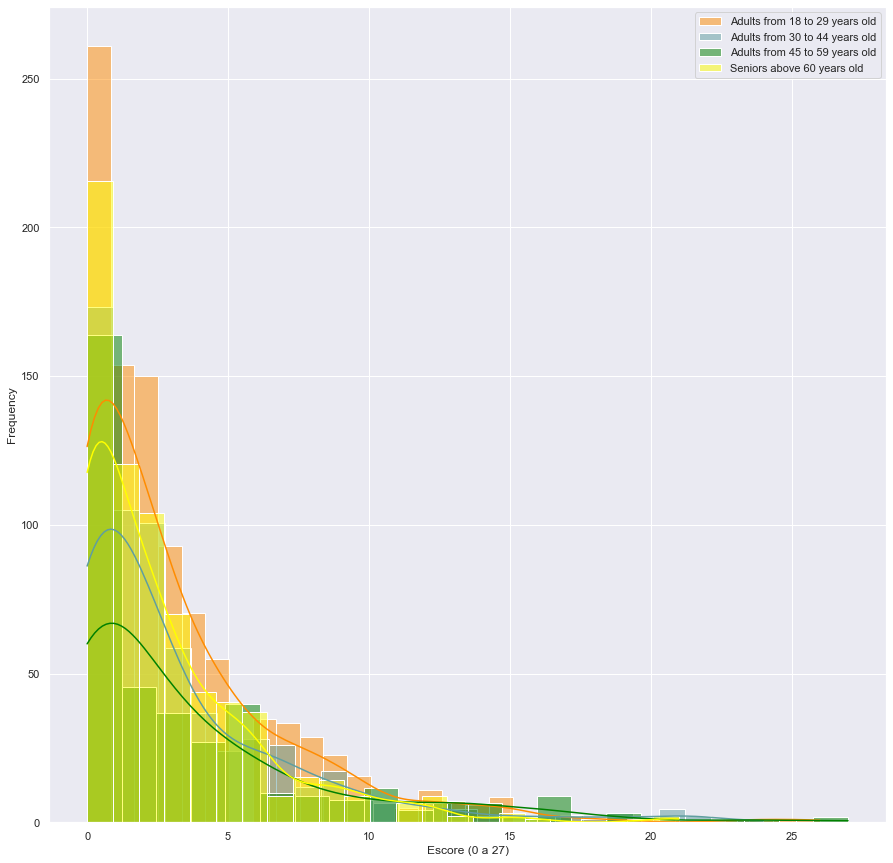

In [42]:
def phq9_sex_age_graph1(gender, age_level):
    sns.set(rc={"figure.figsize": (15, 15)})
    if age_level == "Adults 1":
        age_label = "Adults from 18 to 29 years old"
        colorh = "darkorange"
    elif age_level == "Adults 2":
        age_label = "Adults from 30 to 44 years old"
        colorh = "cadetblue"
    elif age_level == "Adults 3":
        age_label = "Adults from 45 to 59 years old"
        colorh = "green"
    else:
        age_label = "Seniors above 60 years old"
        colorh = "yellow"
    sns.histplot(
        df[df["Sex"] == gender][df["Age_Classif"] == age_level]["phq9"],
        label=age_label,
        stat="frequency",
        color=colorh,
        kde=True,
    )

phq9_sex_age_graph1(2, "Adults 1")
phq9_sex_age_graph1(2, "Adults 2")
phq9_sex_age_graph1(2, "Adults 3")
phq9_sex_age_graph1(2, "Seniors")
plt.xlabel("Escore (0 a 27)")
plt.legend()
plt.show()

#### We need to better visualize the levels from medium to severe, just to see how the curves behave.

C:\Users\User\AppData\Local\Temp/ipykernel_5940/1596248839.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Women_Filter = df[df["phq9"] >= 10][df["Sex"] == 2]


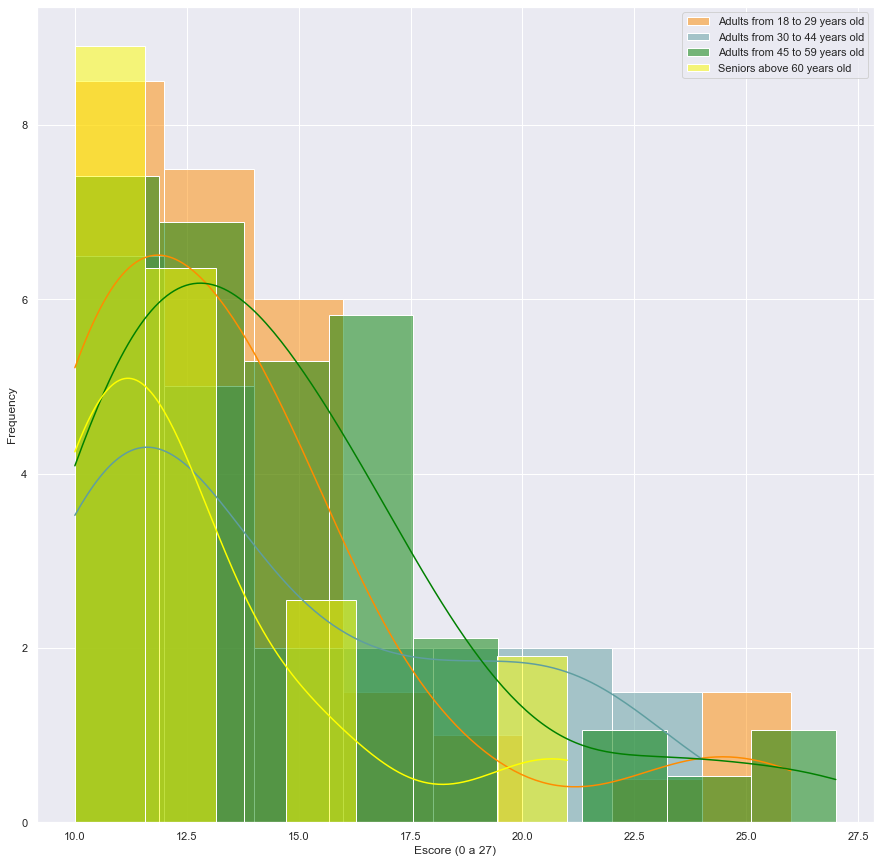

In [43]:
Women_Filter = df[df["phq9"] >= 10][df["Sex"] == 2]

def phq9_sex_age_graph2(gender, age_level):
    sns.set(rc={"figure.figsize": (15, 15)})
    if age_level == "Adults 1":
        age_label = "Adults from 18 to 29 years old"
        colorh = "darkorange"
    elif age_level == "Adults 2":
        age_label = "Adults from 30 to 44 years old"
        colorh = "cadetblue"
    elif age_level == "Adults 3":
        age_label = "Adults from 45 to 59 years old"
        colorh = "green"
    else:
        age_label = "Seniors above 60 years old"
        colorh = "yellow"
    sns.histplot(
        Women_Filter[Women_Filter["Sex"] == gender][Women_Filter["Age_Classif"] == age_level]["phq9"],
        label=age_label,
        stat="frequency",
        color=colorh,
        kde=True,
    )

phq9_sex_age_graph2(2, "Adults 1")
phq9_sex_age_graph2(2, "Adults 2")
phq9_sex_age_graph2(2, "Adults 3")
phq9_sex_age_graph2(2, "Seniors")
plt.xlabel("Escore (0 a 27)")
plt.legend()
plt.show()

#### Let's check the distributions for each age classification for each sex.

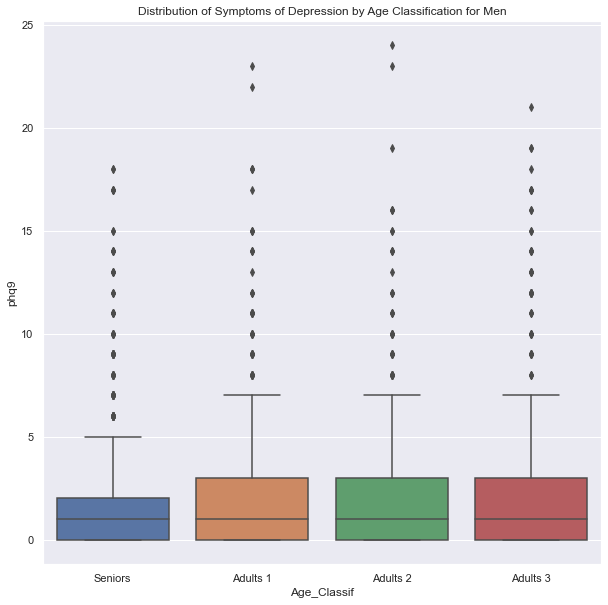

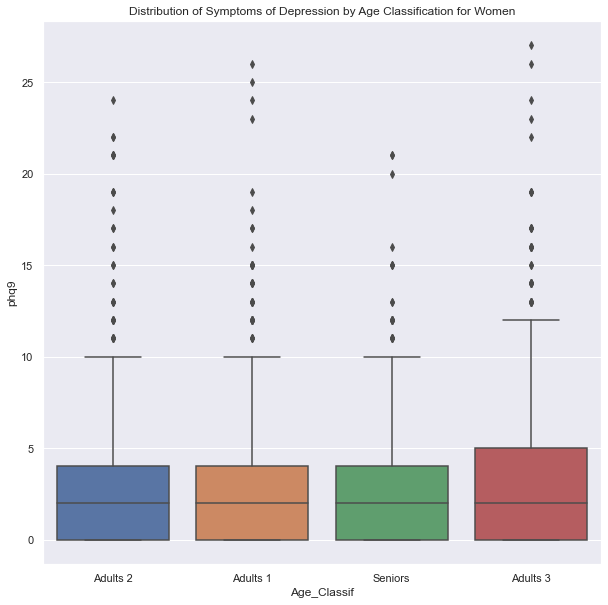

In [44]:
sns.set(rc={"figure.figsize": (10, 10)})
phq9_ageclassif_men = pd.DataFrame(df[df["Sex"] == 1])
sns.boxplot(x="Age_Classif", y="phq9", data=phq9_ageclassif_men).set_title(
    "Distribution of Symptoms of Depression by Age Classification for Men"
)
plt.show()

phq9_ageclassif_women = pd.DataFrame(df[df["Sex"] == 2])
sns.boxplot(x="Age_Classif", y="phq9", data=phq9_ageclassif_women).set_title(
    "Distribution of Symptoms of Depression by Age Classification for Women"
)
plt.show()

#### It will be interesting to verify the final result of how much the age classification influences each gender.
#### Our sample shows that for men and women the seniors would present the lowest level of symptoms, while the category "Adults 3" is the favourite candidate to be the most affected by the symptoms.

#### Let's check what would be the results including the legel of graduation instead of age.
#### Obs.: as the answer "9"has a very low level we will just ignore it from our analysis.

In [45]:
pd.crosstab(
    index=[df["Sex"], df["Graduation_Level"]],
    columns=[df["Depression_Diagnosis"]],
    aggfunc="sum",
    values=df["phq9"],
    normalize=True,
    margins=True,
).T

Sex                          1                                          \
Graduation_Level             1         2         3         4         5   
Depression_Diagnosis                                                     
Almost severe level   0.003678  0.009683  0.009007  0.016363  0.001276   
Low level             0.019065  0.027922  0.038955  0.036553  0.013661   
Medium level          0.015162  0.012610  0.023868  0.017639  0.005254   
No depression         0.017639  0.026496  0.036178  0.037529  0.028972   
Severe level          0.001801  0.005104  0.001576  0.000000  0.000000   
All                   0.057344  0.081813  0.109585  0.108084  0.049163   

Sex                                   2                                \
Graduation_Level            9         1         2         3         4   
Depression_Diagnosis                                                    
Almost severe level   0.00000  0.007506  0.012234  0.009307  0.021542   
Low level             0.00000  0.021166  0.047061  0.049764  0.060722   
Medium level          0.00000  0.017789  0.021166  0.027847  0.031074   
No depression         0.00015  0.015837  0.029048  0.050064  0.056519   
Severe level          0.00000  0.003303  0.008331  0.012084  0.007055   
All                   0.00015  0.065601  0.117841  0.149066  0.176912   

Sex                                            All  
Graduation_Level             5         9            
Depression_Diagnosis                                
Almost severe level   0.002702  0.000000  0.093297  
Low level             0.033476  0.000000  0.348345  
Medium level          0.007881  0.000000  0.180290  
No depression         0.038505  0.000075  0.337011  
Severe level          0.001801  0.000000  0.041057  
All                   0.084365  0.000075  1.000000

#### It is hard to take out full conclusions from this table. We can get it in a better visualization.

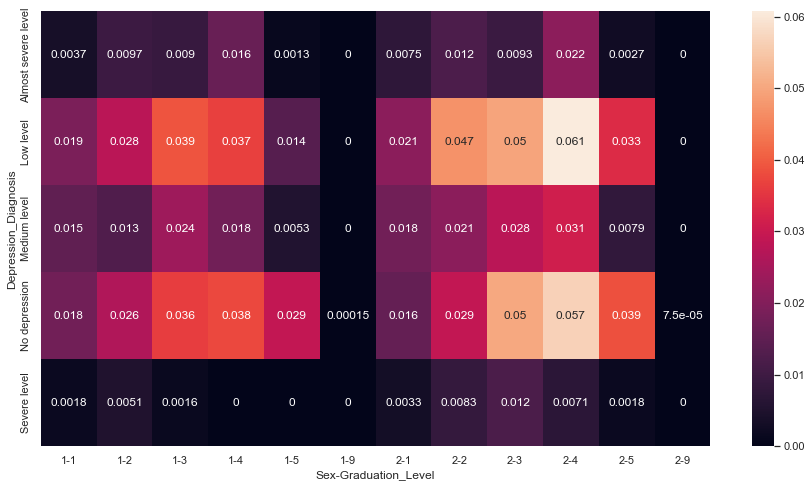

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pd.crosstab(index=[df["Sex"], df["Graduation_Level"]], columns=[df["Depression_Diagnosis"]], aggfunc="sum", values=df["phq9"], normalize=True).T, annot=True);

#### With the heatmap is possible to reinforce that women seem to be more affected by the symptoms of depression.
#### For men and women the symptoms of depression seem higher from levels 2 to 4 (may be higher in level 3 for men, and higher in level 4 for women).
#### It is a fact that our sample shows that higher education level are less affected to the symptoms.

In [47]:
df.groupby("Graduation_Level")["phq9"].describe().T

Graduation_Level,1,2,3,4,5,9
count,530.000000,837.000000,1215.000000,1373.000000,879.000000,2.000000
mean,3.090566,3.178017,2.836214,2.765477,2.023891,1.500000
std,4.132414,4.119401,3.836271,3.817682,2.688137,0.707107
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.500000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,1.750000
max,24.000000,24.000000,26.000000,27.000000,24.000000,2.000000


#### Influence of physical exercises in the analysis.

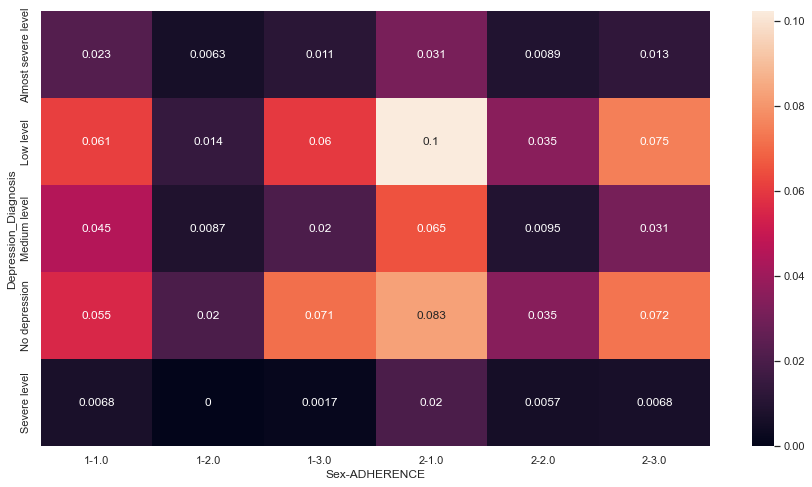

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pd.crosstab(index=[df["Sex"], df["ADHERENCE"]], columns=[df["Depression_Diagnosis"]], aggfunc="sum", values=df["phq9"], normalize=True).T, annot=True);

#### It is interesting that in the heatmap we see that people who exercise more than 300 min per week seem to be more related to higher symptoms than who practice for between 150 and 300 min.
#### The difference in the level of depression between individuals who do less than 150 min of exercise per week and the other two groups is very clear.

#### Level of Depression vs. Alimentation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TOTAL', ylabel='phq9'>

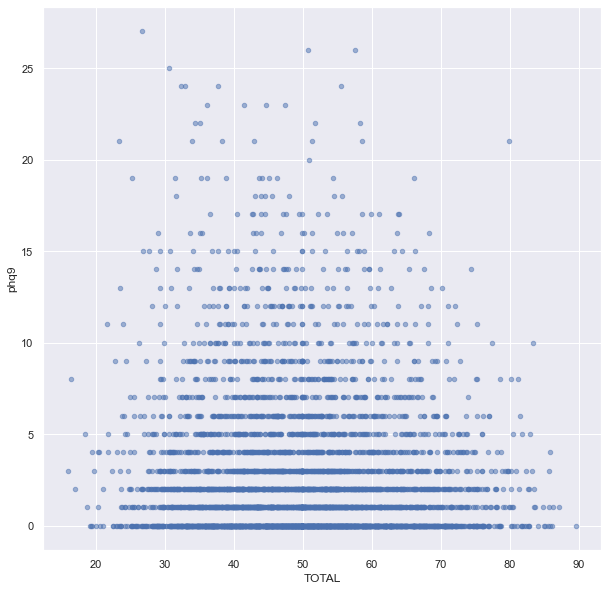

In [49]:
df.plot("TOTAL", "phq9", kind="scatter", alpha=0.5)

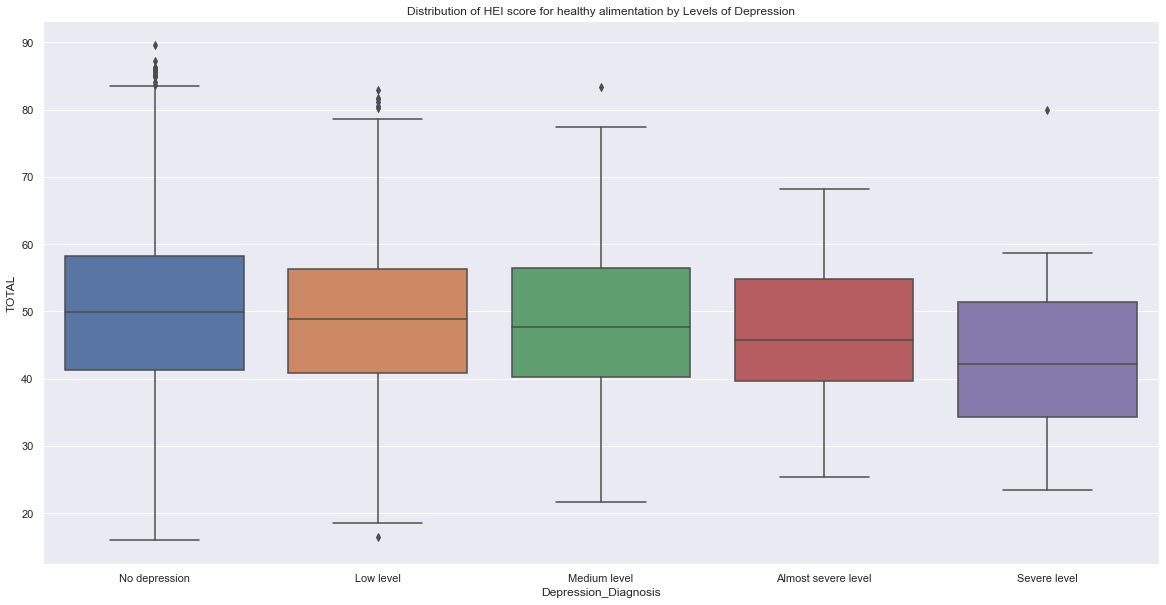

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="Depression_Diagnosis", y="TOTAL", data=df).set_title(
    "Distribution of HEI score for healthy alimentation by Levels of Depression"
);

#### For the higher levels of symptoms of depression we can notice that they hardly reach a total score of 60 points.
#### Maybe people with higher level of depression have not a very good alimentation (HEI < 60).

#### Let's evaluate the influence of the family income.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Family_Income', ylabel='phq9'>

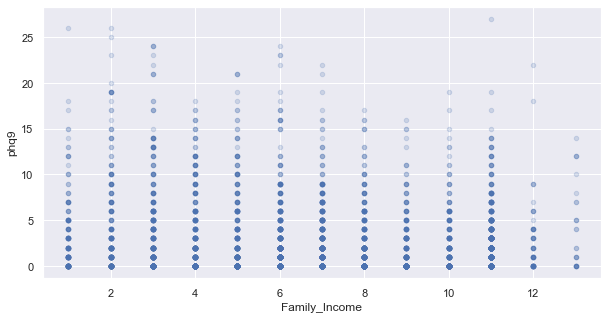

In [51]:
plt.rcParams["figure.figsize"] = [10, 5]
df.plot("Family_Income", "phq9", kind="scatter", alpha=0.2)

#### A first guess would be that the symptoms of depression decrease from the class "8" and on.
#### Another way to visualize it can help.

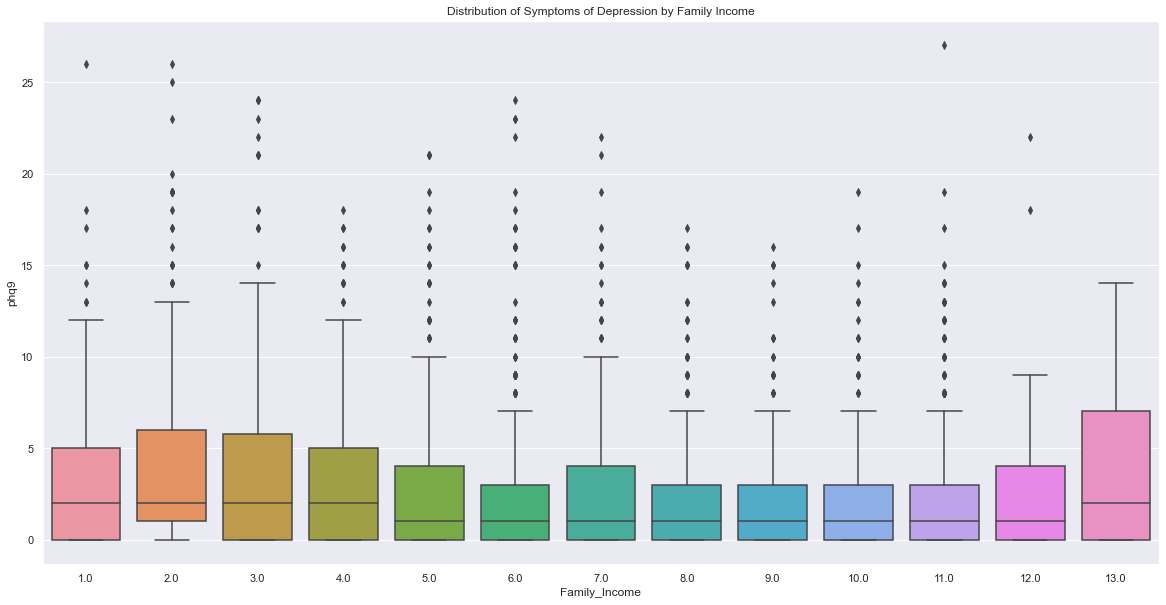

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="Family_Income", y="phq9", data=df).set_title(
    "Distribution of Symptoms of Depression by Family Income"
);

#### Our sample definitely shows that the symptoms of depression decreased for higher family incomes (reminder: "12" and "13" must not be compared to the other answers).

#### Ethnicity and levels of depression. First of all, we need to understand the representativity of each race in our sample.
#### Then, we can check how the levels of depression are distributed for each category.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Ethnicity', ylabel='phq9'>

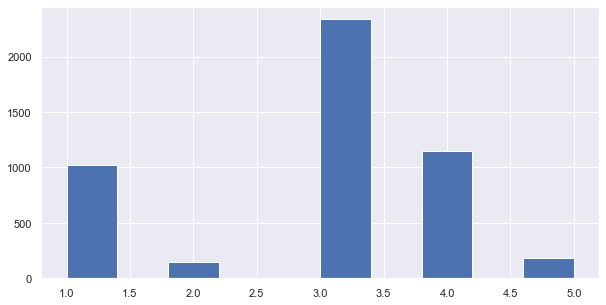

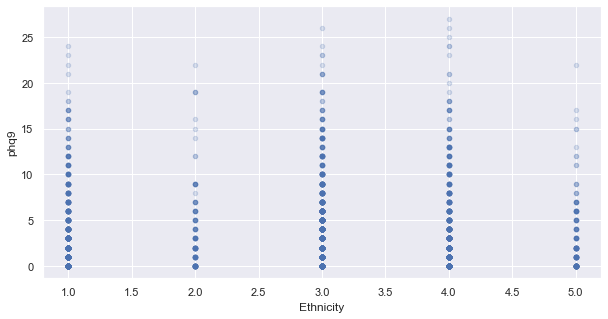

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
df["Ethnicity"].hist()
plt.rcParams["figure.figsize"] = [10, 5]
df.plot("Ethnicity", "phq9", kind="scatter", alpha=0.2)

#### Let's give names to the columns and analyze the means....

<AxesSubplot:xlabel='Ethnicity'>

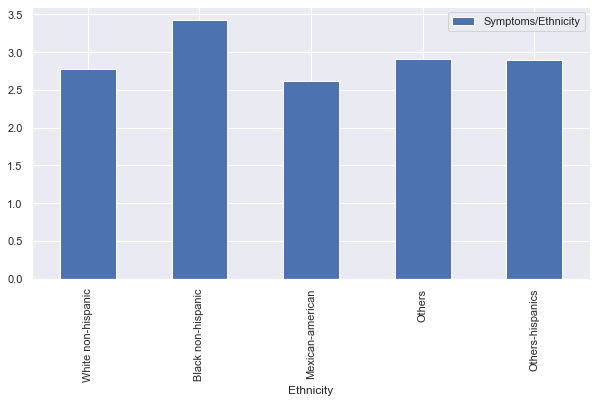

In [54]:
phq9_Eth1 = pd.DataFrame(df[df["Ethnicity"] == 1.0]["phq9"])
Eth1_ratio = phq9_Eth1["phq9"].mean()

phq9_Eth2 = pd.DataFrame(df[df["Ethnicity"] == 2.0]["phq9"])
Eth2_ratio = phq9_Eth2["phq9"].mean()

phq9_Eth3 = pd.DataFrame(df[df["Ethnicity"] == 3.0]["phq9"])
Eth3_ratio = phq9_Eth3["phq9"].mean()

phq9_Eth4 = pd.DataFrame(df[df["Ethnicity"] == 4.0]["phq9"])
Eth4_ratio = phq9_Eth4["phq9"].mean()

phq9_Eth5 = pd.DataFrame(df[df["Ethnicity"] == 5.0]["phq9"])
Eth5_ratio = phq9_Eth5["phq9"].mean()

Symptoms_Ethnicity = {
    "Symptoms/Ethnicity": [
        Eth1_ratio,
        Eth2_ratio,
        Eth3_ratio,
        Eth4_ratio,
        Eth5_ratio,
    ],
    "Ethnicity": [
        "White non-hispanic",
        "Black non-hispanic",
        "Mexican-american",
        "Others",
        "Others-hispanics",
    ],
}

Sympt_Eth = pd.DataFrame.from_dict(Symptoms_Ethnicity)
Sympt_Eth.plot.bar(x="Ethnicity", y="Symptoms/Ethnicity")

#### ....and check the distributions.....

<AxesSubplot:xlabel='Ethnicity', ylabel='phq9'>

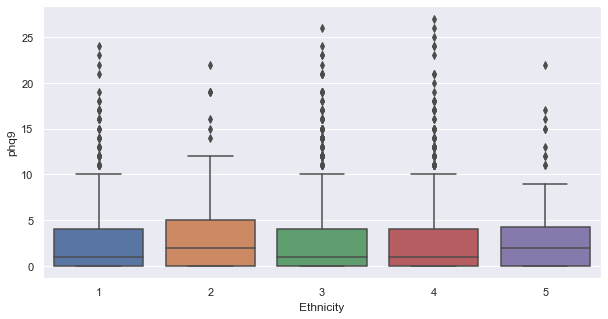

In [55]:
sns.boxplot(x="Ethnicity", y="phq9", data=df)

#### ....even for medium or higher levels os depression.

<AxesSubplot:xlabel='Ethnicity', ylabel='phq9'>

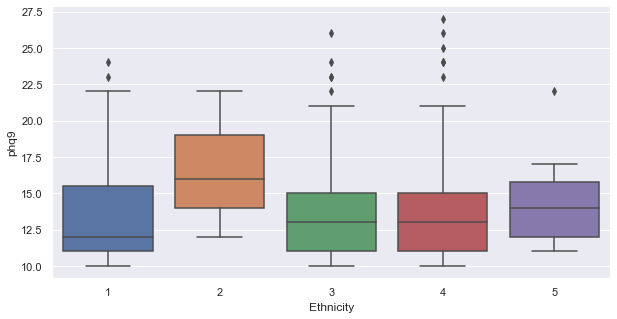

In [56]:
phq9_Ethnicity = pd.DataFrame(df[df["phq9"] >= 10])
sns.boxplot(x="Ethnicity", y="phq9", data=phq9_Ethnicity)

#### We can suspect that group 2 may be the one who has highest levels of symptoms of depression.

## Hypothesis:
####1 - Women are more likely to present higher levels of symptoms of depression than men.

####2 - The age range from 45 to 59 years old is susceptible to higher levels of depression.

####3 - Individuals above 60 years old present lower levels of symptoms of depression.

####4 - Low frequency of physical activities (less than 150 min per week) are more likely to present higher levels of symptoms of depression.

####5 - People who practice more than 300 min of exercise per week present higher levels of symptoms of depression than those who practice between 150 and 300 minutes.

####6 - Higher levels of symptoms of depression are more related to lower HEI scores for alimentation (probably lower than a score of 50)).

####7 - Higher graduation level is more related to a lower level of symptoms of depression.

####8 - Among ethnicity groups, group 2 (Black non-hispanic) is the most affected by symptoms of depression.

####9 - There is a good influence on symptoms of depression for individuals with a family income higher than US$45,000.

#### First is good to check how all the variables correlate to each other.

<AxesSubplot:>

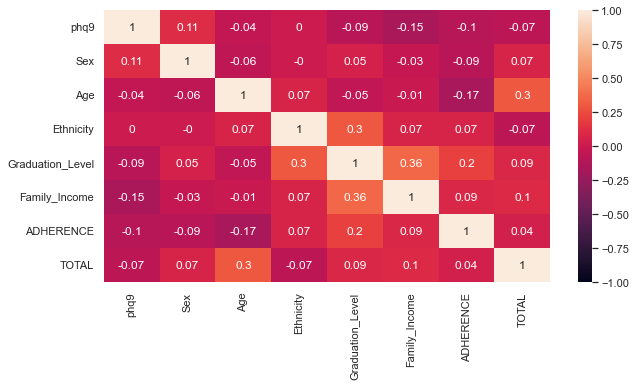

In [57]:
result = pd.DataFrame(
    [
        df["phq9"],
        df["Sex"],
        df["Age"],
        df["Ethnicity"],
        df["Graduation_Level"],
        df["Family_Income"],
        df["ADHERENCE"],
        df["TOTAL"],
    ]
).T

sns.heatmap(result.corr().round(2), annot=True, vmin=-1, vmax=1)

## Hypothesis Verification

#### (1) - Women are more likely to present higher levels of symptoms of depression than men.
#### H0: The means of the levels of symptoms of depression are the same for women and men.
#### Ha: The means of the levels of symptoms of depression are different for women and men.

Mean of symptoms of depression for men from our sample: 2.3213213213213213
Mean of symptoms of depression for women from our sample: 3.1584830339321357


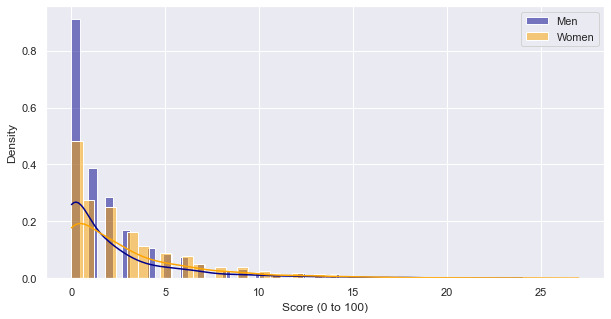

In [58]:
print(
    "Mean of symptoms of depression for men from our sample:",
    df[df["Sex"] == 1]["phq9"].mean(),
)

print(
    "Mean of symptoms of depression for women from our sample:",
    df[df["Sex"] == 2]["phq9"].mean(),
)

sns.histplot(
    df[df["Sex"] == 1]["phq9"],
    label="Men",
    stat="density",
    color="darkblue",
    kde=True,
)
sns.histplot(
    df[df["Sex"] == 2]["phq9"],
    label="Women",
    stat="density",
    color="orange",
    kde=True,
)
plt.xlabel("Score (0 to 100)")
plt.legend()
plt.show()

#### Let's take a better look in it.

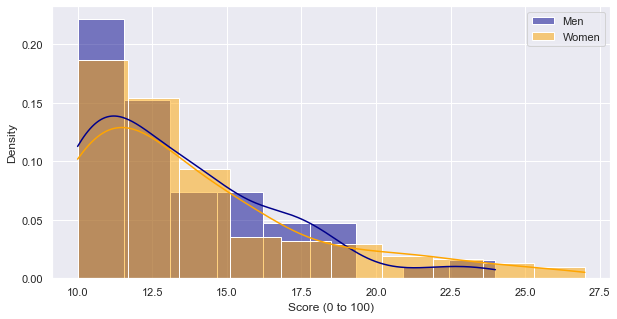

In [59]:
df_phq9_fromMedium = pd.DataFrame(df[df["phq9"] >= 10])

sns.histplot(
    df_phq9_fromMedium[df_phq9_fromMedium["Sex"] == 1]["phq9"],
    label="Men",
    stat="density",
    color="darkblue",
    kde=True,
)
sns.histplot(
    df_phq9_fromMedium[df_phq9_fromMedium["Sex"] == 2]["phq9"],
    label="Women",
    stat="density",
    color="orange",
    kde=True,
)
plt.xlabel("Score (0 to 100)")
plt.legend()
plt.show()

#### The most common analysis and the first one it is taught in statistics classes is to compare male and female through a t-test.

In [60]:
import pingouin as pg

pg.ttest(
    df[df["Sex"] == 2]["phq9"], df[df["Sex"] == 1]["phq9"], correction=False,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.797871,4834,two-sided,7.658063e-15,"[0.63, 1.05]",0.224411,3.925e+11,1.0


#### Here we can see that through t-test, the p-value is very close to zero. Statistically speaking, for a level of significance of 5%, we reject H0.
#### Now we can affirm that the means of female and male are different and that women are more likely to present higher levels of symptoms of depression.

#### Let's verifiy if it would generate the same result using other test as f-test.

In [61]:
from scipy.stats import f_oneway

df_aux = df[["Sex", "phq9"]].dropna()

stat, p = f_oneway(
    df_aux[(df_aux.Sex == 1)]["phq9"],
    df_aux[(df_aux.Sex == 2)]["phq9"],
)

print("stat=%.3f, p=%.3f" % (stat, p))

stat=60.807, p=0.000


#### p-value of 0.000 confirms our previous result.

#### Let's evaluate the influence among the age groups, and here we have two hypothesis.

### (2) - The age range from 45 to 59 years old is susceptible to higher levels of depression.
#### H0: The mean for the levels of symptoms of depression for individual between 45 and 59 years old is lower or equal than for others.
#### Ha: The mean for the levels of symptoms of depression for individual between 45 and 59 years old is higher than for others.

### (3) - Individuals above 60 years old present lower levels of symptoms of depression.
#### H0: The mean for the levels of symptoms of depression for Seniors is higher or equal than for younger ages.
#### Ha: The mean for the levels of symptoms of depression for Seniors is lower than for younger ages.

#### For this analysis we can run a f-test (ANOVA) considering that it is a non-parametric test, and we will analyze all age groups at the same time.

In [62]:
from scipy.stats import f_oneway

df_aux = df[["Age_Classif", "phq9"]].dropna()

stat, p = f_oneway(
    df_aux[(df_aux.Age_Classif == "Adults 1")]["phq9"],
    df_aux[(df_aux.Age_Classif == "Adults 2")]["phq9"],
    df_aux[(df_aux.Age_Classif == "Adults 3")]["phq9"],
    df_aux[(df_aux.Age_Classif == "Seniors")]["phq9"],
)

print("stat=%.3f, p=%.3f" % (stat, p))

stat=10.558, p=0.000


#### Despite of showing a p-value under 0.05, the f-test doesn't show us for which group it was detected this difference/p-value.
#### Let's use another test to have this answer, the Tukey test.

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df_aux["phq9"], df_aux["Age_Classif"], alpha=0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Adults 1 Adults 2  -0.0279 0.9977 -0.4118   0.356  False
Adults 1 Adults 3   0.3771 0.0759 -0.0256  0.7797  False
Adults 1  Seniors  -0.4977 0.0027 -0.8636 -0.1318   True
Adults 2 Adults 3    0.405 0.0677 -0.0193  0.8293  False
Adults 2  Seniors  -0.4698 0.0105 -0.8594 -0.0802   True
Adults 3  Seniors  -0.8748    0.0 -1.2828 -0.4667   True
--------------------------------------------------------


#### The test results indicate that the p-value is under 5% for the comparison against Senior and other groups, representing we must reject H0.
#### For "Adults 3" which are from 45 to 59 years old it was not presented any p-value under 5%, so we must not reject H0.

#### Next Analysis we will consider the influence of physical activities per week.

### (4) - Low frequency of physical activities (less than 150 min per week) are more likely to present higher levels of symptoms of depression.
#### H0: People who present lower frequency of physical activities (less than 150 min per week) has equal level of symptoms of depression than those who exercise more than 150 minutes per week.
#### Ha: People who present lower frequency of physical activities (less than 150 min per week) has different level of symptoms of depression than those who exercise more than 150 minutes per week.

### (5) - People who practice more than 300 min of exercise per week present higher levels of symptoms of depression than those who practice between 150 and 300 minutes.
#### H0: People who has frequency of physical activities above 300 min per week has equal or lower level of symptoms of depression than those who exercise between 150 and 300 minutes per week.
#### Ha: People who has frequency of physical activities above 300 min per week has higher level of symptoms of depression than those who exercise between 150 and 300 minutes per week.

In [64]:
df_aux = df[["ADHERENCE", "phq9"]].dropna()

tukey1 = pairwise_tukeyhsd(df_aux["phq9"], df_aux["ADHERENCE"], alpha=0.05)

print(tukey1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.6916    0.0 -1.0641  -0.319   True
   1.0    3.0  -0.8567    0.0 -1.1306 -0.5827   True
   2.0    3.0  -0.1651 0.5522 -0.5377  0.2074  False
----------------------------------------------------


#### The hypothesis #4 has its H0 discarded for a level of confidence of 95%. People with less than 150 minutes of physical activities per week tend to present higher levels of symptoms of depression.
#### But hypothesis #5 must not reject H0, there is no statistical confirmation that people who exercise more than 300 min per week are more likely to present higher symptoms of depression than those who present from 150 to 300 minutes.

### (6) - Higher levels of symptoms of depression are more related to lower HEI scores for alimentation (probably lower than a score of 50).
#### H0: people with almost severe and severe symptoms has a HEI score >= 50.
#### Ha: people with almost severe and severe symptoms has a HEI score < 50.
#### Here we are going to use the confidence intervals to check if they reach the mentioned score.

In [65]:
import scipy.stats as st

Mean_HEI_Sympt_AlmostSevere = df[
    df["Depression_Diagnosis"] == "Almost severe level"
]["TOTAL"].mean()
print("Mean of HEI score for individuals with almost severe depression diagnosis:", Mean_HEI_Sympt_AlmostSevere)

StaDev_HEI_Sympt_AlmostSevere = df[
    df["Depression_Diagnosis"] == "Almost severe level"
]["TOTAL"].std()
print("Standard deviation:", StaDev_HEI_Sympt_AlmostSevere)


HEI_Sympt_AlmostSevere = pd.DataFrame(
    df[df["Depression_Diagnosis"] == "Almost severe level"]["TOTAL"]
)
print("Quantity of elements in Almost Severe Level classification:", HEI_Sympt_AlmostSevere.shape)
n_HEI_Sympt_AlmostSevere = 75

print("Confidence Interval of HEI score for individuals with almost severe level symptoms:", st.norm.interval(0.95, loc = Mean_HEI_Sympt_AlmostSevere, scale = StaDev_HEI_Sympt_AlmostSevere/np.sqrt(n_HEI_Sympt_AlmostSevere)))


Mean of HEI score for individuals with almost severe depression diagnosis: 46.86616470872674
Standard deviation: 10.666080901850972
Quantity of elements in Almost Severe Level classification: (75, 1)
Confidence Interval of HEI score for individuals with almost severe level symptoms: (44.45224771131937, 49.28008170613411)


In [66]:
Mean_HEI_Sympt_Severe = df[
    df["Depression_Diagnosis"] == "Severe level"
]["TOTAL"].mean()
print("Mean of HEI score for individuals with severe depression diagnosis:", Mean_HEI_Sympt_AlmostSevere)

StaDev_HEI_Sympt_Severe = df[
    df["Depression_Diagnosis"] == "Severe level"
]["TOTAL"].std()
print("Standard deviation:", StaDev_HEI_Sympt_Severe)


HEI_Sympt_Severe = pd.DataFrame(
    df[df["Depression_Diagnosis"] == "Severe level"]["TOTAL"]
)
print("Quantity of elements in Severe Level classification:", HEI_Sympt_AlmostSevere.shape)
n_HEI_Sympt_Severe = 75

print("Confidence Interval of HEI score for individuals with severe level symptoms:", st.norm.interval(0.95, loc = Mean_HEI_Sympt_Severe, scale = StaDev_HEI_Sympt_Severe/np.sqrt(n_HEI_Sympt_Severe)))


Mean of HEI score for individuals with severe depression diagnosis: 46.86616470872674
Standard deviation: 12.876033836010343
Quantity of elements in Severe Level classification: (75, 1)
Confidence Interval of HEI score for individuals with severe level symptoms: (40.96491291759591, 46.79304739772047)


#### Here we can notice that the confidence interval of both groups (Almost Severe and Severe levels) don't reach the HEI score of 50. With these results we must reject H0 for the two hypothesis.

### (7) - Higher graduation level is more related to a lower level of symptoms of depression.
#### H0: people with with higher education level has equal levels of symptoms of depression as those with lower education levels.
#### Ha: people with with higher education level has different levels of symptoms of depression as those with lower education levels.

#### For non-parametric test with more than two groups let's use Tukey test.

Mean of phq9 for individuals graduated from high school: 2.8362139917695472
Mean of phq9 for individuals who have not finished higher education level: 2.7654770575382375
Mean of phq9 for individuals who have completed higher education level: 2.0238907849829353
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0875 0.9983 -0.5038  0.6787  False
     1      3  -0.2544 0.7809 -0.8088  0.3001  False
     1      4  -0.3251 0.5309 -0.8698  0.2196  False
     1      5  -1.0667    0.0 -1.6525 -0.4809   True
     1      9  -1.5906  0.991 -9.1367  5.9556  False
     2      3  -0.3418 0.3216 -0.8203  0.1367  False
     2      4  -0.4125  0.119 -0.8796  0.0546  False
     2      5  -1.1541    0.0 -1.6686 -0.6397   True
     2      9   -1.678 0.9885 -9.2189  5.8629  False
     3      4  -0.0707 0.9968 -0.4903  0.3488  False
     3      5  -0.8123    0.0  -1.284 -0.3407   Tr

<AxesSubplot:xlabel='Graduation_Level', ylabel='phq9'>

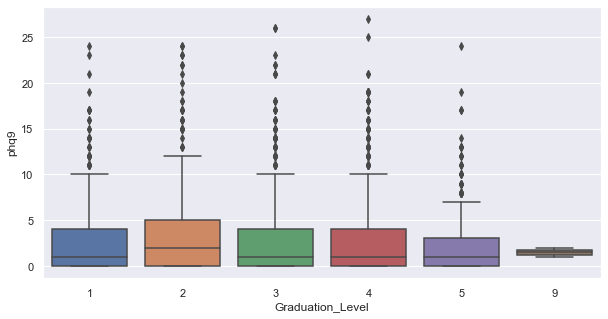

In [67]:
Mean_CompHighSchool = df[df["Graduation_Level"] == 3]["phq9"].mean()
print("Mean of phq9 for individuals graduated from high school:", Mean_CompHighSchool)

Mean_IncCollege = df[df["Graduation_Level"] == 4]["phq9"].mean()
print("Mean of phq9 for individuals who have not finished higher education level:", Mean_IncCollege)

Mean_CompCollege = df[df["Graduation_Level"] == 5]["phq9"].mean()
print("Mean of phq9 for individuals who have completed higher education level:", Mean_CompCollege)

df_aux = df[["Graduation_Level", "phq9"]].dropna()

tukey2 = pairwise_tukeyhsd(df_aux["phq9"], df_aux["Graduation_Level"], alpha=0.05)

print(tukey2)

sns.boxplot(x="Graduation_Level", y="phq9", data=df)

#### All p-value analysis with higher education group are under 5%. We must reject H0 for a level of confidence of 0.05.

### (8) - Among ethnicity groups, group 2 (Black non-hispanic) is the most affected by symptoms of depression.
#### H0: The mean of phq9 for group 2 is equal to the other groups.
#### Ha: The mean of phq9 for group 2 is different to the other groups.
#### The chosen test is Tukey test.

In [68]:
df_aux = df[["Ethnicity", "phq9"]].dropna()

tukey3 = pairwise_tukeyhsd(df_aux["phq9"], df_aux["Ethnicity"], alpha=0.05)

print(tukey3)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.6585 0.2738 -0.2471 1.5641  False
     1      3  -0.1566 0.7999 -0.5404 0.2273  False
     1      4    0.139 0.9108 -0.3012 0.5792  False
     1      5   0.1237  0.994  -0.696 0.9435  False
     2      3  -0.8151 0.0807 -1.6883 0.0581  False
     2      4  -0.5195 0.5128 -1.4189 0.3799  False
     2      5  -0.5348 0.6997 -1.6693 0.5997  False
     3      4   0.2956  0.185 -0.0734 0.6645  False
     3      5   0.2803 0.8662 -0.5035 1.0641  False
     4      5  -0.0153    1.0 -0.8281 0.7975  False
---------------------------------------------------


#### To a confidence level of 95%, there are no statistical evidences that group 2 has different level of symptoms of depression. We must not discard H0.

### (9) - There is a good influence on symptoms of depression for individuals with a family income higher than US45,000.

#### H0: Individuals with family income higher than US45,000 have phq9 score equal or higher than people with lower income.
#### Ha: Individuals with family income higher than US45,000 have phq9 score lower than people with income below US45,000.
#### The chosen test is Tukey test.

In [69]:
df["Family_Income"] = df["Family_Income"].astype("int")

df_Income = pd.DataFrame(df[df["Family_Income"] <= 11])
df_Income

df_Income_aux = df_Income[["Family_Income", "phq9"]].dropna()

tukey4 = pairwise_tukeyhsd(
    df_Income_aux["phq9"], df_Income_aux["Family_Income"], alpha=0.05
)

print(tukey4)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.8624 0.3876 -0.3103  2.0352  False
     1      3   0.5318  0.893 -0.5556  1.6193  False
     1      4   0.0937    1.0  -1.007  1.1944  False
     1      5  -0.2048    1.0 -1.3022  0.8926  False
     1      6  -0.7743 0.3492 -1.8015   0.253  False
     1      7  -0.7568 0.3902 -1.7876   0.274  False
     1      8  -1.0069 0.0873 -2.0777  0.0638  False
     1      9  -1.0922 0.0869 -2.2529  0.0685  False
     1     10   -0.855 0.4062 -2.0315  0.3214  False
     1     11  -1.2694 0.0017 -2.2549 -0.2839   True
     2      3  -0.3306 0.9897 -1.2812    0.62  False
     2      4  -0.7687 0.2684 -1.7344   0.197  False
     2      5  -1.0673 0.0157 -2.0292 -0.1053   True
     2      6  -1.6367    0.0 -2.5178 -0.7556   True
     2      7  -1.6192    0.0 -2.5044  -0.734   True
     2      8  -1.8694    0.0 -2.8008  -0.938 

#### The table shows that for individuals with family income above US25,000 there is no representative differene, statistically speaking for a level of confidence of 5%.
#### p-value is lower than 0.05 among groups 6 to 11. We  must not reject H0, but we should rewrite our hypothesis:
#### H0: Individuals with family income higher than US25,000 have phq9 score equal or higher than people with lower income.
#### Ha: Individuals with family income higher than US25,000 have phq9 score lower than people with income below US25,000.
#### Now we must reject H0.

<AxesSubplot:xlabel='Family_Income', ylabel='Age'>

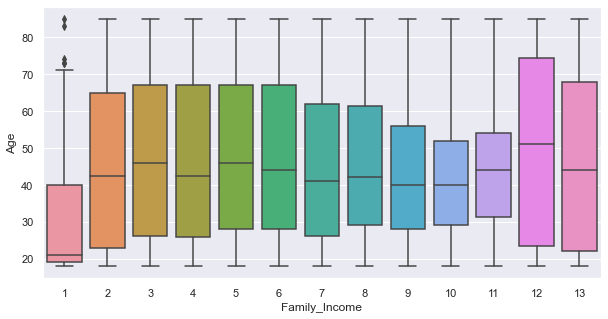

In [70]:
#### Let's verify the evidence about group 1 be less affected by symptoms of depression when compared to the other, but group 11.

sns.boxplot(x="Family_Income", y="Age", data=df)

#### In the boxplot above, we can verify that the people from group 1 are younger than the other groups, which may can explain differences that can lead them to be less influenced to symptoms of depression (different life moments, worries, social life, expactations, etc.).